In [114]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Periods and Period Arithmetic

In [2]:
p = pd.Period("2011", freq="A-DEC") #Year End
p

Period('2011', 'A-DEC')

In [3]:
p + 5

Period('2016', 'A-DEC')

In [4]:
p - 2

Period('2009', 'A-DEC')

In [5]:
pd.Period("2015", freq = "A-DEC") -p

<4 * YearEnds: month=12>

In [6]:
period = pd.period_range("2000-01-01", "2000-06-01", freq = "M")
period

PeriodIndex(['2000-01', '2000-02', '2000-03', '2000-04', '2000-05', '2000-06'], dtype='period[M]')

In [7]:
pd.Series(np.random.standard_normal(6), index = period)

2000-01   -0.980874
2000-02    0.179697
2000-03    0.069746
2000-04    1.423581
2000-05    0.029902
2000-06   -0.024473
Freq: M, dtype: float64

### Period frequency conversion

In [13]:
p= pd.Period("2011", freq="A-DEC")
p

Period('2011', 'A-DEC')

In [14]:
p.asfreq("M", how = "start")

Period('2011-01', 'M')

In [15]:
p.asfreq("M", how= "end")

Period('2011-12', 'M')

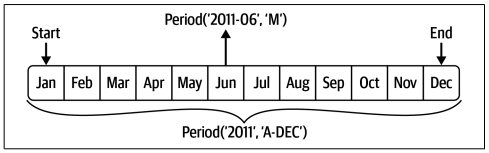

In [26]:
periods = pd.period_range("2006","2009", freq="A-DEC")

In [28]:
ts = pd.Series(np.random.standard_normal(len(periods)), index= periods)
ts

2006   -0.280175
2007    2.041368
2008    0.214735
2009   -0.374047
Freq: A-DEC, dtype: float64

In [30]:
ts.asfreq("M", how="start")

2006-01   -0.280175
2007-01    2.041368
2008-01    0.214735
2009-01   -0.374047
Freq: M, dtype: float64

In [31]:
ts.asfreq("M", how="end")

2006-12   -0.280175
2007-12    2.041368
2008-12    0.214735
2009-12   -0.374047
Freq: M, dtype: float64

### Quarterly Period Frequency

In [32]:
p = pd.Period("2012Q4", freq="Q-JAN")
p

Period('2012Q4', 'Q-JAN')

In [33]:
p.asfreq("D", how="start")

Period('2011-11-01', 'D')

In [34]:
p.asfreq("D", how="end")

Period('2012-01-31', 'D')

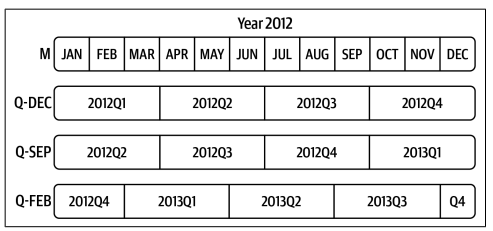

### Converting timestamps to period and back

In [36]:
dates = pd.date_range("2000-01-01", periods=3, freq="M")
dates

DatetimeIndex(['2000-01-31', '2000-02-29', '2000-03-31'], dtype='datetime64[ns]', freq='M')

In [37]:
ts = pd.Series(np.random.standard_normal(len(dates)), index=dates)
ts

2000-01-31    0.708462
2000-02-29    0.786103
2000-03-31    1.320126
Freq: M, dtype: float64

In [38]:
pts = ts.to_period()
pts

2000-01    0.708462
2000-02    0.786103
2000-03    1.320126
Freq: M, dtype: float64

In [40]:
dates = pd.date_range("2000-01-29", periods=6)
dates

DatetimeIndex(['2000-01-29', '2000-01-30', '2000-01-31', '2000-02-01',
               '2000-02-02', '2000-02-03'],
              dtype='datetime64[ns]', freq='D')

In [41]:
ts2 = pd.Series(np.random.standard_normal(len(dates)), index=dates)
ts2

2000-01-29    1.398674
2000-01-30    0.377744
2000-01-31   -0.586501
2000-02-01   -1.299568
2000-02-02   -1.134492
2000-02-03   -1.735218
Freq: D, dtype: float64

In [42]:
ts2.to_period("M")

2000-01    1.398674
2000-01    0.377744
2000-01   -0.586501
2000-02   -1.299568
2000-02   -1.134492
2000-02   -1.735218
Freq: M, dtype: float64

In [46]:
ts2.to_period()

2000-01-29    1.398674
2000-01-30    0.377744
2000-01-31   -0.586501
2000-02-01   -1.299568
2000-02-02   -1.134492
2000-02-03   -1.735218
Freq: D, dtype: float64

In [47]:
ts2.to_period().to_timestamp(how="end")

2000-01-29 23:59:59.999999999    1.398674
2000-01-30 23:59:59.999999999    0.377744
2000-01-31 23:59:59.999999999   -0.586501
2000-02-01 23:59:59.999999999   -1.299568
2000-02-02 23:59:59.999999999   -1.134492
2000-02-03 23:59:59.999999999   -1.735218
Freq: D, dtype: float64

### Creating PeriodIndex from Array

In [48]:
data = pd.read_csv("macrodata.csv")
data.head(5)

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
0,1959,1,2710.349,1707.4,286.898,470.045,1886.9,28.98,139.7,2.82,5.8,177.146,0.00,0.00
1,1959,2,2778.801,1733.7,310.859,481.301,1919.7,29.15,141.7,3.08,5.1,177.830,2.34,0.74
2,1959,3,2775.488,1751.8,289.226,491.260,1916.4,29.35,140.5,3.82,5.3,178.657,2.74,1.09
3,1959,4,2785.204,1753.7,299.356,484.052,1931.3,29.37,140.0,4.33,5.6,179.386,0.27,4.06
4,1960,1,2847.699,1770.5,331.722,462.199,1955.5,29.54,139.6,3.50,5.2,180.007,2.31,1.19


In [49]:
data['year']

0      1959
1      1959
2      1959
3      1959
4      1960
       ... 
198    2008
199    2008
200    2009
201    2009
202    2009
Name: year, Length: 203, dtype: int64

In [50]:
data['quarter']

0      1
1      2
2      3
3      4
4      1
      ..
198    3
199    4
200    1
201    2
202    3
Name: quarter, Length: 203, dtype: int64

In [51]:
index = pd.PeriodIndex(year=data['year'], quarter = data['quarter'], freq="Q-DEC")
index

PeriodIndex(['1959Q1', '1959Q2', '1959Q3', '1959Q4', '1960Q1', '1960Q2',
             '1960Q3', '1960Q4', '1961Q1', '1961Q2',
             ...
             '2007Q2', '2007Q3', '2007Q4', '2008Q1', '2008Q2', '2008Q3',
             '2008Q4', '2009Q1', '2009Q2', '2009Q3'],
            dtype='period[Q-DEC]', length=203)

In [52]:
data.index = index

In [53]:
data.head(5)

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
1959Q1,1959,1,2710.349,1707.4,286.898,470.045,1886.9,28.98,139.7,2.82,5.8,177.146,0.00,0.00
1959Q2,1959,2,2778.801,1733.7,310.859,481.301,1919.7,29.15,141.7,3.08,5.1,177.830,2.34,0.74
1959Q3,1959,3,2775.488,1751.8,289.226,491.260,1916.4,29.35,140.5,3.82,5.3,178.657,2.74,1.09
1959Q4,1959,4,2785.204,1753.7,299.356,484.052,1931.3,29.37,140.0,4.33,5.6,179.386,0.27,4.06
1960Q1,1960,1,2847.699,1770.5,331.722,462.199,1955.5,29.54,139.6,3.50,5.2,180.007,2.31,1.19


## Resampling and Frequency conversion

In [54]:
dates = pd.date_range("2000-01-01", periods=100)
dates

DatetimeIndex(['2000-01-01', '2000-01-02', '2000-01-03', '2000-01-04',
               '2000-01-05', '2000-01-06', '2000-01-07', '2000-01-08',
               '2000-01-09', '2000-01-10', '2000-01-11', '2000-01-12',
               '2000-01-13', '2000-01-14', '2000-01-15', '2000-01-16',
               '2000-01-17', '2000-01-18', '2000-01-19', '2000-01-20',
               '2000-01-21', '2000-01-22', '2000-01-23', '2000-01-24',
               '2000-01-25', '2000-01-26', '2000-01-27', '2000-01-28',
               '2000-01-29', '2000-01-30', '2000-01-31', '2000-02-01',
               '2000-02-02', '2000-02-03', '2000-02-04', '2000-02-05',
               '2000-02-06', '2000-02-07', '2000-02-08', '2000-02-09',
               '2000-02-10', '2000-02-11', '2000-02-12', '2000-02-13',
               '2000-02-14', '2000-02-15', '2000-02-16', '2000-02-17',
               '2000-02-18', '2000-02-19', '2000-02-20', '2000-02-21',
               '2000-02-22', '2000-02-23', '2000-02-24', '2000-02-25',
      

In [55]:
ts = pd.Series(np.random.standard_normal(len(dates)), index=dates)
ts

2000-01-01    1.075058
2000-01-02   -0.250517
2000-01-03   -0.981859
2000-01-04   -0.185793
2000-01-05   -1.632283
                ...   
2000-04-05   -0.158985
2000-04-06    1.095526
2000-04-07   -0.960583
2000-04-08   -0.917743
2000-04-09   -1.317671
Freq: D, Length: 100, dtype: float64

In [56]:
ts.resample("M").mean()

2000-01-31    0.087662
2000-02-29   -0.208261
2000-03-31    0.120572
2000-04-30   -0.432903
Freq: M, dtype: float64

In [58]:
ts.resample("M", kind="period").mean()

2000-01    0.087662
2000-02   -0.208261
2000-03    0.120572
2000-04   -0.432903
Freq: M, dtype: float64

In [59]:
# Downsampling = aggregating from higer to lower frequency. - devideds into bins / slices

dates = pd.date_range("2000-01-01", periods=12, freq="T")
dates

DatetimeIndex(['2000-01-01 00:00:00', '2000-01-01 00:01:00',
               '2000-01-01 00:02:00', '2000-01-01 00:03:00',
               '2000-01-01 00:04:00', '2000-01-01 00:05:00',
               '2000-01-01 00:06:00', '2000-01-01 00:07:00',
               '2000-01-01 00:08:00', '2000-01-01 00:09:00',
               '2000-01-01 00:10:00', '2000-01-01 00:11:00'],
              dtype='datetime64[ns]', freq='T')

In [61]:
ts = pd.Series(np.random.standard_normal(len(dates)), index=dates)
ts

2000-01-01 00:00:00   -0.168986
2000-01-01 00:01:00    1.321498
2000-01-01 00:02:00   -0.877534
2000-01-01 00:03:00   -1.035395
2000-01-01 00:04:00   -0.797771
2000-01-01 00:05:00    1.935986
2000-01-01 00:06:00   -1.130176
2000-01-01 00:07:00   -0.050321
2000-01-01 00:08:00    1.074323
2000-01-01 00:09:00   -0.044469
2000-01-01 00:10:00   -0.657239
2000-01-01 00:11:00    0.109793
Freq: T, dtype: float64

In [63]:
ts.resample("5min").sum()

2000-01-01 00:00:00   -1.558188
2000-01-01 00:05:00    1.785343
2000-01-01 00:10:00   -0.547446
Freq: 5T, dtype: float64

In [64]:
ts.resample("5min", closed="right").sum()

1999-12-31 23:55:00   -0.168986
2000-01-01 00:00:00    0.546784
2000-01-01 00:05:00   -0.807882
2000-01-01 00:10:00    0.109793
Freq: 5T, dtype: float64

In [65]:
ts.resample("5min", closed="right",label="right").sum()

2000-01-01 00:00:00   -0.168986
2000-01-01 00:05:00    0.546784
2000-01-01 00:10:00   -0.807882
2000-01-01 00:15:00    0.109793
Freq: 5T, dtype: float64

In [66]:
ts.resample("5min", closed="right",label="left").sum()

1999-12-31 23:55:00   -0.168986
2000-01-01 00:00:00    0.546784
2000-01-01 00:05:00   -0.807882
2000-01-01 00:10:00    0.109793
Freq: 5T, dtype: float64

### Open-high-close-low(OHLC) resampling

In [67]:
ts = pd.Series(np.random.permutation(np.arange(len(dates))), index=dates)
ts

2000-01-01 00:00:00     1
2000-01-01 00:01:00    11
2000-01-01 00:02:00     2
2000-01-01 00:03:00     8
2000-01-01 00:04:00     6
2000-01-01 00:05:00     9
2000-01-01 00:06:00     0
2000-01-01 00:07:00    10
2000-01-01 00:08:00     7
2000-01-01 00:09:00     5
2000-01-01 00:10:00     4
2000-01-01 00:11:00     3
Freq: T, dtype: int32

In [68]:
ts.resample("5min").ohlc()

,open,high,low,close
2000-01-01 00:00:00,1,11,1,6
2000-01-01 00:05:00,9,10,0,5
2000-01-01 00:10:00,4,4,3,3


In [69]:
# Upsampling - Converting from lower frequency to higher frequency

frame = pd.DataFrame(np.random.standard_normal((2,4)), index=pd.date_range("2000-01-01", periods=2, 
                                                                         freq="W-WED"), 
                   columns=list('abcd'))
frame

,a,b,c,d
2000-01-05,-1.141426,1.105501,-0.972444,0.890043
2000-01-12,0.891351,-0.841989,-1.937927,0.752825


In [70]:
df_daily = frame.resample("D").asfreq()

In [71]:
df_daily

,a,b,c,d
2000-01-05,-1.141426,1.105501,-0.972444,0.890043
2000-01-06,NaN,NaN,NaN,NaN
2000-01-07,NaN,NaN,NaN,NaN
2000-01-08,NaN,NaN,NaN,NaN
2000-01-09,NaN,NaN,NaN,NaN
2000-01-10,NaN,NaN,NaN,NaN
2000-01-11,NaN,NaN,NaN,NaN
2000-01-12,0.891351,-0.841989,-1.937927,0.752825


In [73]:
frame.resample("D").ffill()

,a,b,c,d
2000-01-05,-1.141426,1.105501,-0.972444,0.890043
2000-01-06,-1.141426,1.105501,-0.972444,0.890043
2000-01-07,-1.141426,1.105501,-0.972444,0.890043
2000-01-08,-1.141426,1.105501,-0.972444,0.890043
2000-01-09,-1.141426,1.105501,-0.972444,0.890043
2000-01-10,-1.141426,1.105501,-0.972444,0.890043
2000-01-11,-1.141426,1.105501,-0.972444,0.890043
2000-01-12,0.891351,-0.841989,-1.937927,0.752825


### Resampling with Period

In [75]:
frame = pd.DataFrame(np.random.standard_normal((24,4)), 
                    index = pd.period_range("1-2000", "12-2001", freq="M"), 
                    columns=list('abcd'))
frame

,a,b,c,d
2000-01,0.136306,0.028300,-0.269286,-0.624495
2000-02,0.733100,-0.281874,-1.784866,-0.610039
2000-03,0.810295,-1.331557,-1.054178,-0.479509
2000-04,0.719496,0.351615,-0.419353,-0.076818
2000-05,1.290622,-0.224597,-1.749953,-2.361725
2000-06,0.331295,0.747683,1.136337,1.898173
2000-07,-1.149607,0.921585,-0.010822,-0.582088
2000-08,-0.772581,-0.338636,1.473624,-1.949781
2000-09,0.491300,-1.019522,0.527742,-0.018618
2000-10,0.998851,1.254750,-1.564760,-3.428441


In [76]:
annual_frame = frame.resample("A-DEC").mean()
annual_frame

,a,b,c,d
2000,0.209116,-0.108665,-0.275770,-0.429677
2001,0.581077,-0.336227,-0.127317,0.486884


In [78]:
annual_frame.resample("Q-DEC").ffill()

,a,b,c,d
2000Q1,0.209116,-0.108665,-0.275770,-0.429677
2000Q2,0.209116,-0.108665,-0.275770,-0.429677
2000Q3,0.209116,-0.108665,-0.275770,-0.429677
2000Q4,0.209116,-0.108665,-0.275770,-0.429677
2001Q1,0.581077,-0.336227,-0.127317,0.486884
2001Q2,0.581077,-0.336227,-0.127317,0.486884
2001Q3,0.581077,-0.336227,-0.127317,0.486884
2001Q4,0.581077,-0.336227,-0.127317,0.486884


In [79]:
annual_frame.resample("Q-MAR").ffill()

,a,b,c,d
2000Q4,0.209116,-0.108665,-0.275770,-0.429677
2001Q1,0.209116,-0.108665,-0.275770,-0.429677
2001Q2,0.209116,-0.108665,-0.275770,-0.429677
2001Q3,0.209116,-0.108665,-0.275770,-0.429677
2001Q4,0.581077,-0.336227,-0.127317,0.486884
2002Q1,0.581077,-0.336227,-0.127317,0.486884
2002Q2,0.581077,-0.336227,-0.127317,0.486884
2002Q3,0.581077,-0.336227,-0.127317,0.486884


## Moving Windows Functions

In [80]:
close_px_all = pd.read_csv("stock_px.csv", parse_dates=True, index_col=0)

In [81]:
close_px = close_px_all[["AAPL", "MSFT", "XOM"]]
close_px

,AAPL,MSFT,XOM
2003-01-02,7.40,21.11,29.22
2003-01-03,7.45,21.14,29.24
2003-01-06,7.45,21.52,29.96
2003-01-07,7.43,21.93,28.95
2003-01-08,7.28,21.31,28.83
...,...,...,...
2011-10-10,388.81,26.94,76.28
2011-10-11,400.29,27.00,76.27
2011-10-12,402.19,26.96,77.16
2011-10-13,408.43,27.18,76.37


In [82]:
close_px.resample("B").ffill()

,AAPL,MSFT,XOM
2003-01-02,7.40,21.11,29.22
2003-01-03,7.45,21.14,29.24
2003-01-06,7.45,21.52,29.96
2003-01-07,7.43,21.93,28.95
2003-01-08,7.28,21.31,28.83
...,...,...,...
2011-10-10,388.81,26.94,76.28
2011-10-11,400.29,27.00,76.27
2011-10-12,402.19,26.96,77.16
2011-10-13,408.43,27.18,76.37


<Axes: >

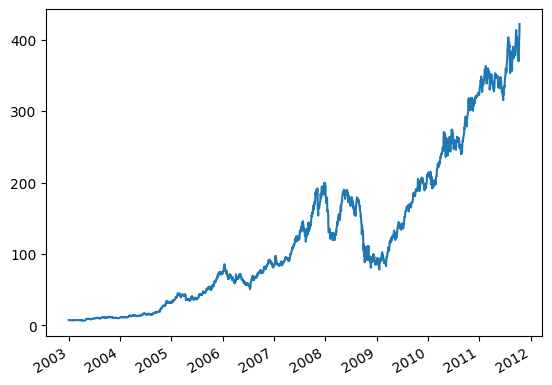

In [84]:
close_px["AAPL"].plot()

<Axes: >

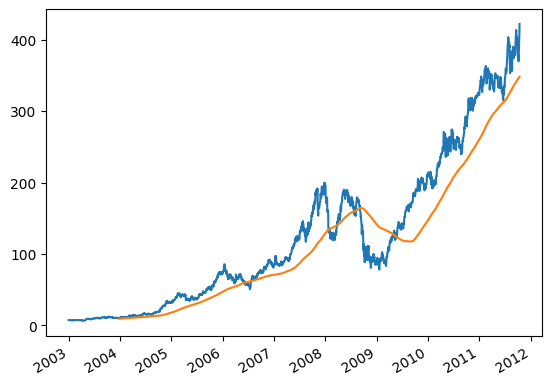

In [89]:
close_px["AAPL"].plot()
close_px["AAPL"].rolling(250).mean().plot()

In [93]:
std250 = close_px["AAPL"].pct_change().rolling(250, min_periods=10).std()

In [94]:
std250

2003-01-02         NaN
2003-01-03         NaN
2003-01-06         NaN
2003-01-07         NaN
2003-01-08         NaN
                ...   
2011-10-10    0.015486
2011-10-11    0.015585
2011-10-12    0.015379
2011-10-13    0.015395
2011-10-14    0.015427
Name: AAPL, Length: 2214, dtype: float64

<Axes: >

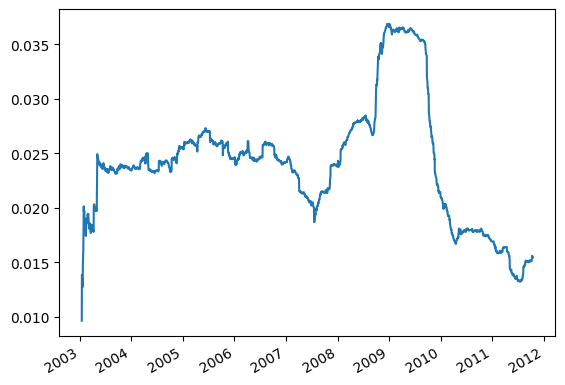

In [95]:
std250.plot()

In [97]:
expanding_mean = std250.expanding().mean()
expanding_mean

2003-01-02         NaN
2003-01-03         NaN
2003-01-06         NaN
2003-01-07         NaN
2003-01-08         NaN
                ...   
2011-10-10    0.024046
2011-10-11    0.024042
2011-10-12    0.024038
2011-10-13    0.024034
2011-10-14    0.024030
Name: AAPL, Length: 2214, dtype: float64

<Axes: >

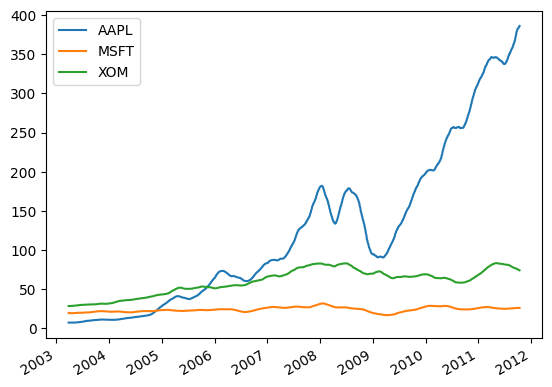

In [101]:
close_px.rolling(60).mean().plot()

<Axes: >

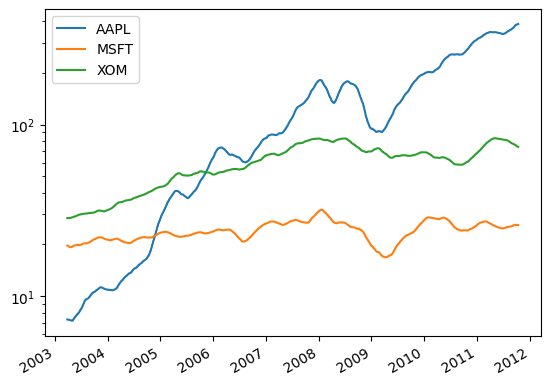

In [102]:
close_px.rolling(60).mean().plot(logy=True)

In [103]:
close_px.rolling("20D").mean()

,AAPL,MSFT,XOM
2003-01-02,7.400000,21.110000,29.220000
2003-01-03,7.425000,21.125000,29.230000
2003-01-06,7.433333,21.256667,29.473333
2003-01-07,7.432500,21.425000,29.342500
2003-01-08,7.402000,21.402000,29.240000
...,...,...,...
2011-10-10,389.351429,25.602143,72.527857
2011-10-11,388.505000,25.674286,72.835000
2011-10-12,388.531429,25.810000,73.400714
2011-10-13,388.826429,25.961429,73.905000


### Exponentially Weighted Functions

In [104]:
apple_px = close_px["AAPL"]["2006":"2007"]

In [105]:
ma30 = apple_px.rolling(30, min_periods=20).mean()

In [106]:
ewma30 = apple_px.ewm(span=30).mean()

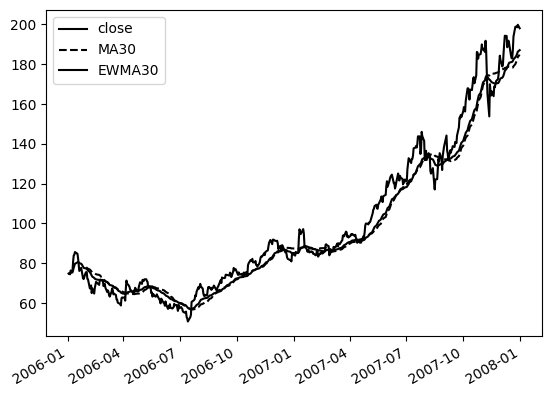

In [118]:
apple_px.plot(style = "k-", label='close')
ma30.plot(style="k--", label="MA30")
ewma30.plot(style="k-", label="EWMA30")
plt.legend()

### Binary Moving Window Function

In [119]:
spx_px = close_px_all["SPX"]
spx_rets = spx_px.pct_change()
returns = close_px.pct_change()

In [120]:
corr = returns['AAPL'].rolling(125, min_periods=100).corr(spx_rets)

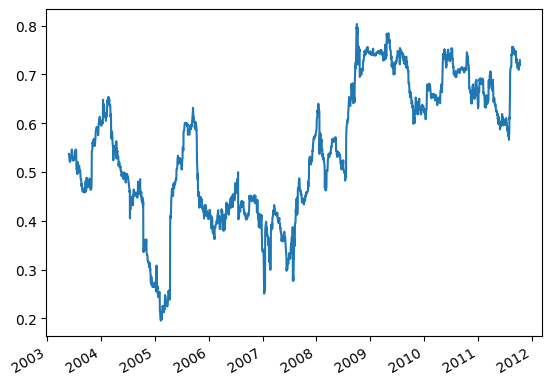

In [121]:
corr.plot();

In [122]:
corr = returns.rolling(125, min_periods=100).corr(spx_rets)

<Axes: >

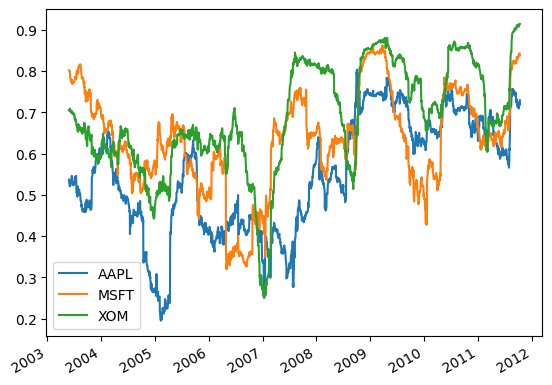

In [123]:
corr.plot()

### User Defined Moving Windows functions

In [125]:
from scipy.stats import percentileofscore

In [128]:
def score_at_2_percent(x):
    return percentileofscore(x, 0.02)

In [130]:
result = returns['AAPL'].rolling(250).apply(score_at_2_percent)

<Axes: >

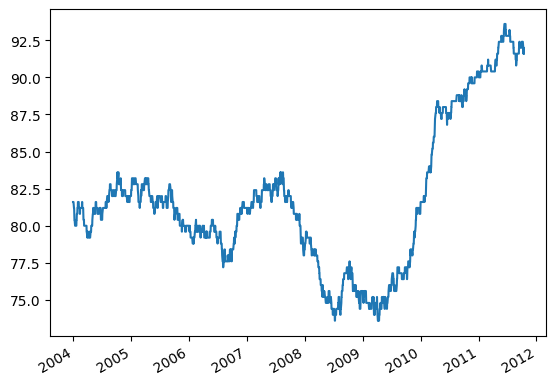

In [131]:
result.plot() #Percentile rank of 2% AAPL return over one-year window

In [132]:
percentileofscore?